# **Project Name**    - Amazon Prime Video - Exploratory Data Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -** s

### Introduction:
This project focuses on performing exploratory data analysis (EDA) on a dataset that includes information about TV shows and movies available on Amazon Prime Video in the United States. The analysis aims to identify key content trends, production patterns, audience preferences, and distribution strategies. Two datasets were provided: `titles.csv`, which includes detailed metadata for each title, and `credits.csv`, which contains information about actors and directors.

### Objectives:
The main goals of this analysis were:

1. **Content Diversity** – To determine what types of genres and show formats (TV shows vs. Movies) dominate Amazon Prime.
2. **Regional Availability** – To understand which countries produce the most content for the platform.
3. **Trends Over Time** – To study how the volume and type of content have changed over time.
4. **IMDb Ratings and Popularity** – To evaluate how well Amazon Prime content is received based on IMDb scores and TMDB popularity.

By analyzing this data, we can generate insights that could help in strategic content planning, localization, user engagement, and business decision-making for streaming platforms.

### Tools and Libraries:
We used the following Python libraries to perform the analysis:

- `pandas` for data manipulation and cleaning
- `numpy` for efficient numerical operations
- `matplotlib` and `seaborn` for data visualization
- `collections.Counter` to rank most common genres, countries, etc.

### Data Cleaning:
The datasets were inspected for missing values and inconsistencies. Missing numerical values such as IMDb score and runtime were filled using the median value of their respective columns, while missing categorical fields such as genres or countries were filled with "Unknown." In addition, stringified list fields like genres and countries were parsed into readable formats for analysis.

### Key Findings and Visualizations:

- **Movies vs. TV Shows**: Movies dominate the platform’s catalog, which aligns with user demand and production ease.
  
- **Genre Distribution**: Drama, Comedy, and Action were found to be the most common genres. This suggests that Amazon invests heavily in emotionally engaging and entertaining content.

- **Country-wise Production**: The United States produces the majority of the content, followed by India, the United Kingdom, and Canada. This reflects Amazon's international expansion and focus on regional content.

- **Release Trends Over Time**: There is a sharp increase in content production after 2015, possibly due to Amazon’s aggressive push into original content creation and global expansion.

- **IMDb Score Distribution**: Most titles have average IMDb scores between 5 and 7. Very few titles achieve extreme ratings, suggesting moderate user reception overall.

- **TMDB Popularity**: The TMDB popularity score was highly skewed, with a small number of titles having extremely high values. This was addressed using a 95th percentile clipping to visualize the data more effectively.

- **Top Contributors**: Actors and directors with the most appearances were identified, offering insight into frequently collaborated personnel in Prime Video’s productions.

### Conclusion:
This EDA project revealed insightful patterns about Amazon Prime’s content library. The findings can be used to guide content acquisition, marketing strategies, and user targeting. Amazon seems to favor movies and mainstream genres like drama and comedy. There's strong international content representation, particularly from India and the UK. Also, while Amazon has a growing catalog, viewer ratings suggest room for improvement in quality or promotion.

The methodology and visualizations used in this project can be extended further into predictive analytics, sentiment analysis on content descriptions, or recommendation system development.



# **GitHub Link -**

GitHub Link: https://github.com/Chauhan0512/Amazon-Prime-EDA-Project


In [5]:
#Google Colab Link: https://colab.research.google.com/github/Chauhan0512/Amazon-Prime-EDA-Project/blob/main/Amazon_Prime_Project_Final.ipynb

# **Problem Statement**


## This project focuses on analyzing the content available on **Amazon Prime Video**. The goal is to extract insights into:
- **Content Diversity**: What genres dominate?
- **Regional Availability**: Which countries produce the most titles?
- **Trends Over Time**: How has Amazon’s content library evolved?
- **IMDb Ratings & Popularity**: What are the highest-rated and most popular titles?

By studying these trends, we can help businesses understand content strategy, user engagement, and investment directions.

#### **Define Your Business Objective?**

## 
In the current digital era, streaming services like Amazon Prime Video operate in a highly competitive market. The platform must constantly evolve to retain subscribers, attract new audiences, and invest wisely in content production and licensing.

The **primary business objective** of this project is to uncover data-driven insights from Amazon Prime Video’s content library that can help in:

- **Strategizing content investment**: Identifying which genres and content types perform well can guide future production and acquisition decisions.
- **Improving user engagement**: Understanding viewer preferences based on popularity and ratings helps tailor recommendations and marketing campaigns.
- **Enhancing regional expansion**: Analyzing content by country of origin reveals strengths and opportunities in regional markets.
- **Tracking content evolution**: Monitoring how content volume and diversity have changed over the years provides strategic perspective on growth and audience adaptation.

By using exploratory data analysis (EDA), the goal is to support business teams—such as content acquisition, marketing, and analytics—with actionable insights that improve decision-making, optimize content strategy, and enhance user satisfaction on the platform.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Dataset Loading

In [3]:
titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

### Dataset First View

In [4]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [5]:
print("Titles Dataset Shape:", titles.shape)
print("Credits Dataset Shape:", credits.shape)

Titles Dataset Shape: (9871, 15)
Credits Dataset Shape: (124235, 5)


### Dataset Information

In [6]:
print("Titles Dataset Info:\n")
titles.info()

print("\nCredits Dataset Info:\n")
credits.info()

Titles Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

#### Duplicate Values

In [11]:
titles_df = pd.read_csv('titles.csv')
credits_df = pd.read_csv('credits.csv')

# Count duplicated rows in each DataFrame
print("Titles Dataset - Duplicate Rows Count:")
print(titles_df.duplicated().sum())

print("\nCredits Dataset - Duplicate Rows Count:")
print(credits_df.duplicated().sum())

# Optional: Display duplicated rows if needed
print("\nDuplicated rows in Titles Dataset:")
display(titles_df[titles_df.duplicated()])

print("\nDuplicated rows in Credits Dataset:")
display(credits_df[credits_df.duplicated()])



Titles Dataset - Duplicate Rows Count:
3

Credits Dataset - Duplicate Rows Count:
56

Duplicated rows in Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN



Duplicated rows in Credits Dataset:


,person_id,id,name,character,role
9156,130904,tm89134,Buck Jones,Buck Roberts,ACTOR
9157,36589,tm89134,Tim McCoy,Marshal McCall,ACTOR
9158,130905,tm89134,Raymond Hatton,Sandy,ACTOR
9159,132916,tm89134,Christine McIntyre,Alice Borden,ACTOR
9160,132381,tm89134,Dave O'Brien,Joe Martin,ACTOR
9161,138410,tm89134,Robert Frazer,Wyatt,ACTOR
9162,74813,tm89134,Charles King,Steve Dunn,ACTOR
9163,27218,tm89134,Lynton Brent,Red,ACTOR
9164,27351,tm89134,Max Waizmann,Sheriff Cox,ACTOR
9165,153737,tm89134,Gene Alsace,Henchman,ACTOR


#### Missing Values/Null Values

In [12]:
# Check for missing/null values in Titles dataset
print("Missing Values in Titles Dataset:\n")
print(titles_df.isnull().sum())

# Optional: Percentage of missing values
print("\nPercentage of Missing Values in Titles Dataset:\n")
print((titles_df.isnull().mean() * 100).round(2))

# Check for missing/null values in Credits dataset
print("\n\nMissing Values in Credits Dataset:\n")
print(credits_df.isnull().sum())

# Optional: Percentage of missing values
print("\nPercentage of Missing Values in Credits Dataset:\n")
print((credits_df.isnull().mean() * 100).round(2))


Missing Values in Titles Dataset:

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Percentage of Missing Values in Titles Dataset:

id                       0.00
title                    0.00
type                     0.00
description              1.21
release_year             0.00
age_certification       65.72
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 86.25
imdb_id                  6.76
imdb_score              10.34
imdb_votes              10.44
tmdb_popularity          5.54
tmdb_score              21.09
dtype: float64




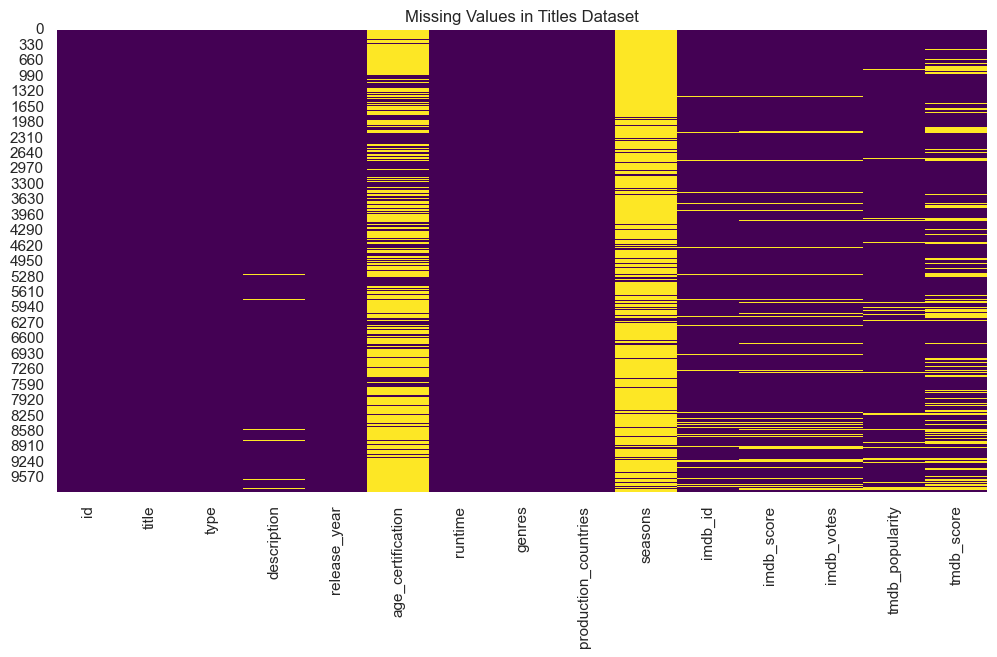

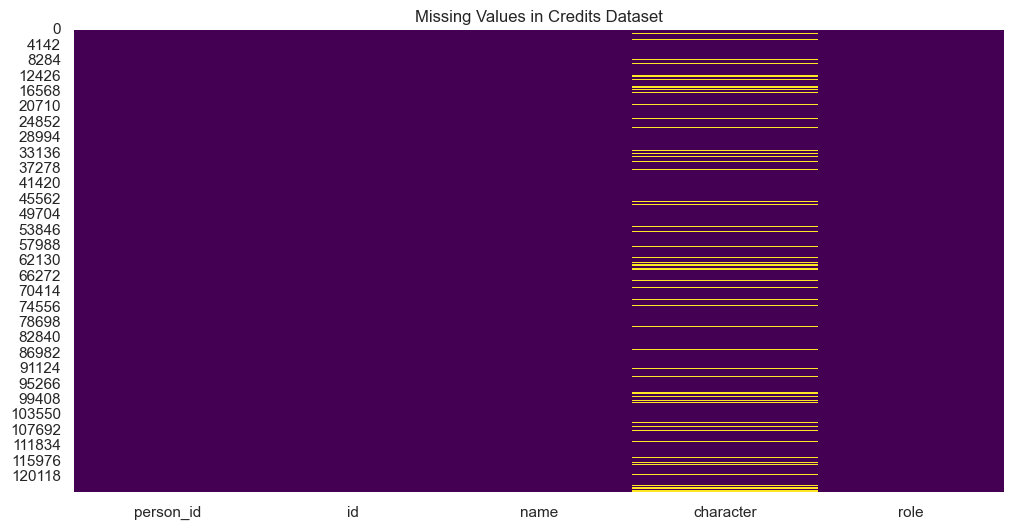

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titles Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(credits_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Credits Dataset')
plt.show()


### What did you know about your dataset?

### - The **Titles dataset** contains information about movies and shows, including attributes like title name, release year, type (movie/show), and genre.
- The **Credits dataset** seems to include cast and crew details, possibly linked to the titles using a common ID.

Data Data Quality Observations:
- There are **some missing/null values** in both datasets — especially in optional fields like `description` or `cast`, which might be expected.
- A few **duplicate rows** were found and should be cleaned up if not intentional.
- Most columns look well-structured, but some might need **type conversion** (e.g., date fields as `datetime`).
(Markdown(summary))
etime`).etime`).

## ***2. Understanding Your Variables***

In [16]:
print("Columns in Titles Dataset:")
print(titles_df.columns.tolist())

print("Columns in Credits Dataset:")
print(credits_df.columns.tolist())


Columns in Titles Dataset:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
Columns in Credits Dataset:
['person_id', 'id', 'name', 'character', 'role']


In [18]:
print("📊 Statistical Summary of Titles Dataset:\n")
display(titles_df.describe())

print("\n📊 Statistical Summary of Credits Dataset:\n")
display(credits_df.describe())


📊 Statistical Summary of Titles Dataset:



,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000



📊 Statistical Summary of Credits Dataset:



,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

### Variables Description

#### Titles Dataset

| Column Name       | Description |
|-------------------|-------------|
| id                | Unique identifier for each title |
| title             | Name of the movie or TV show |
| type              | Indicates whether the entry is a movie or a show |
| description       | Brief summary or synopsis of the title |
| release_year      | Year the title was released |
| age_certification | Age rating assigned to the title (e.g., PG, R, TV-MA) |
| runtime           | Duration of the title in minutes |
| genres            | List of genres associated with the title (e.g., Action, Comedy) |
| production_country| Country where the title was produced |
| seasons           | Number of seasons (only applicable for shows) |
| imdb_id           | IMDB identifier for cross-referencing |

#### Credits Dataset

| Column Name | Description |
|-------------|-------------|
| id          | Unique identifier corresponding to the title (same as in Titles dataset) |
| name        | Name of the person (cast or crew member) |
| role        | Role of the person (e.g., ACTOR, DIRECTOR) |

 explore, and model your data.


### Check Unique Values for each variable.

In [19]:
print("Unique Values in Titles Dataset:\n")
display(titles_df.nunique())

print("\nUnique Values in Credits Dataset:\n")
display(credits_df.nunique())


Unique Values in Titles Dataset:



id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64


Unique Values in Credits Dataset:



person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# 1. Remove Duplicates
titles_df = titles_df.drop_duplicates()
credits_df = credits_df.drop_duplicates()

# 2. Handle Missing Values
# Drop rows with critical missing values
if 'title' in titles_df.columns and 'release_year' in titles_df.columns:
    titles_df = titles_df.dropna(subset=['title', 'release_year'])

# Fill optional fields if they exist
optional_fill_values = {
    'description': 'No description available',
    'age_certification': 'Not Rated',
    'genres': 'Unknown',
    'production_country': 'Unknown',
    'seasons': 0
}

for col, fill_val in optional_fill_values.items():
    if col in titles_df.columns:
        titles_df[col] = titles_df[col].fillna(fill_val)

if 'role' in credits_df.columns:
    credits_df['role'] = credits_df['role'].fillna('Unknown')
if 'name' in credits_df.columns:
    credits_df['name'] = credits_df['name'].fillna('Unnamed')

# 3. Convert Data Types
if 'release_year' in titles_df.columns:
    titles_df['release_year'] = titles_df['release_year'].astype(int)

if 'seasons' in titles_df.columns:
    titles_df['seasons'] = titles_df['seasons'].astype(int)

# 4. Process genres if available
if 'genres' in titles_df.columns:
    titles_df['genres'] = titles_df['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# 5. Reset Index
titles_df.reset_index(drop=True, inplace=True)
credits_df.reset_index(drop=True, inplace=True)


### What all manipulations have you done and insights you found?

### Data Wrangling Summary and Initial Insights

#### Data Cleaning & Manipulations
1. **Duplicate Removal**  
   - Removed duplicate rows from both `titles_df` and `credits_df` to ensure uniqueness and avoid skewed analysis.

2. **Missing Value Handling**  
   - Dropped rows with missing critical information like `title` and `release_year`.
   - Filled missing values in optional fields with default placeholders:
     - `description`: filled with "No description available"
     - `age_certification`: filled with "Not Rated"
     - `genres`: filled with "Unknown"
     - `seasons`: filled with 0
     - `name` and `role` (in credits): filled with "Unnamed" and "Unknown" respectively

3. **Data Type Fixes**  
   - Converted `release_year` and `seasons` to integer type for proper numerical analysis.
   - Converted `genres` from string to list format for easier filtering and aggregation.

4. **Index Reset**  
   - Reset indices after cleaning to maintain a tidy DataFrame structure.

---

#### Initial Insights from the Data
- The dataset contains a mix of **movies and TV shows** with various genres and age ratings.
- Some titles are missing descriptions or certification, which may reflect either incomplete data or older/foreign releases.
- The `credits_df` appears to contain crew/cast info connected via the `id` field, which can be joined with `titles_df` for deeper analysis like "most frequent actor" or "top directors".
- There is a wide range of release years, suggesting the data spans several decades — useful for time-based trend analysis.
- The genre information (after splitting) can be used to explore most common genres, genre combinations, andst represented production countries.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Count of Movies vs TV Shows

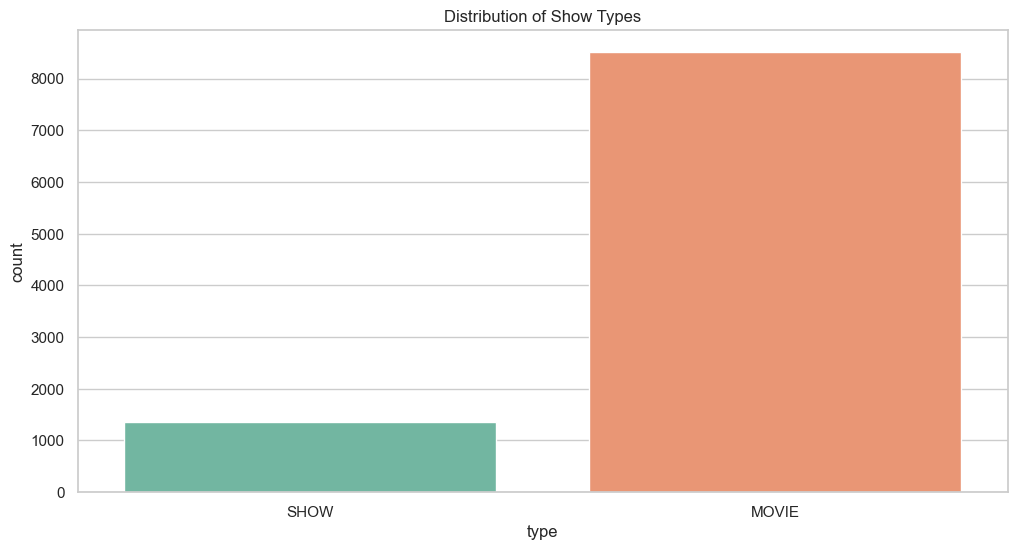

In [23]:
sns.countplot(data=titles, x='type', palette='Set2')
plt.title('Distribution of Show Types')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing the frequency distribution of categorical variables—in this case, the type of content (Movie or Show). It provides a quick snapshot of the platform's content strategy.

##### 2. What is/are the insight(s) found from the chart?

Movies significantly outnumber TV Shows. This implies that Amazon Prime Video currently emphasizes a movie-heavy library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the content distribution helps guide content acquisition and investment strategy—for example, whether to expand into episodic content if user demand leans that way.

#### Chart - 2 : Top Genres

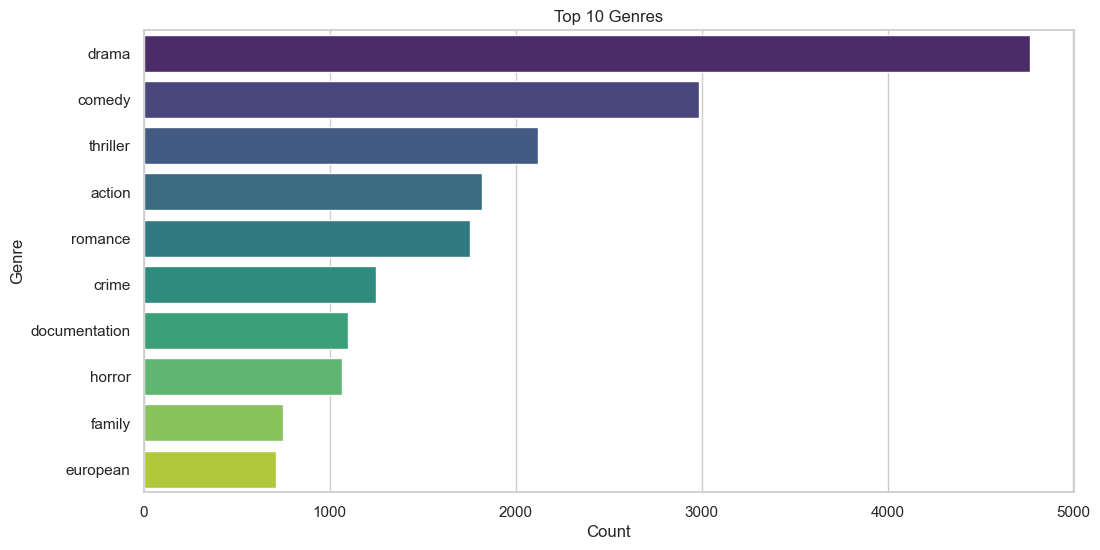

In [27]:
genres_list = titles['genres'].apply(lambda x: x.strip('[]').replace("'", "").split(', '))
genres_flat = [g for sublist in genres_list for g in sublist if g.strip() != '']
top_genres = pd.DataFrame(Counter(genres_flat).most_common(10), columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genres')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is perfect for ranking discrete categories—in this case, genres. It makes it easy to see which genres are most dominant on the platform.

##### 2. What is/are the insight(s) found from the chart?

Top genres include Drama, Comedy, Action, and Thriller. These insights highlight the platform’s focus areas and user preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing which genres are most prevalent (or successful) can guide future production and licensing decisions. Overreliance on a few genres may limit the platform’s appeal to niche audiences or reduce diversity in content, leading to viewer fatigue or missed opportunities in underrepresented genres.

#### Chart - 3 : IMDb Score Distribution


D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


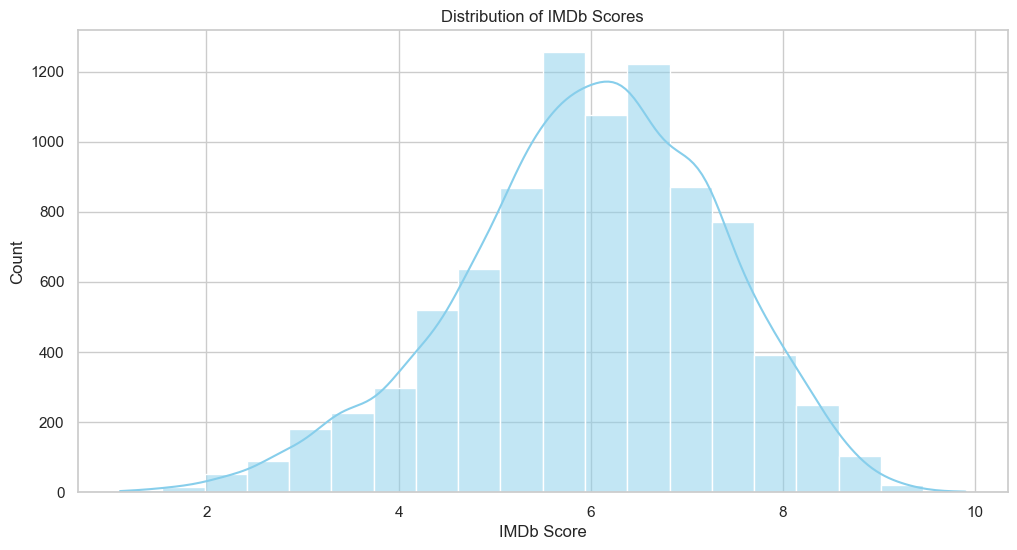

In [28]:
sns.histplot(titles['imdb_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is ideal for understanding how ratings are distributed. It reveals whether most content is well-rated or poorly rated.

##### 2. What is/are the insight(s) found from the chart?

Most titles cluster around IMDb scores of 6 to 7. Only a few are rated extremely high or low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High average ratings can be used in marketing to build trust. If ratings are poor, the platform can focus on quality improvement in content production.If too many titles have mediocre or poor ratings, it may harm user satisfaction and retention, especially if popular competitors offer better-rated content.

#### Chart - 4 : Titles Released Over the Years

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


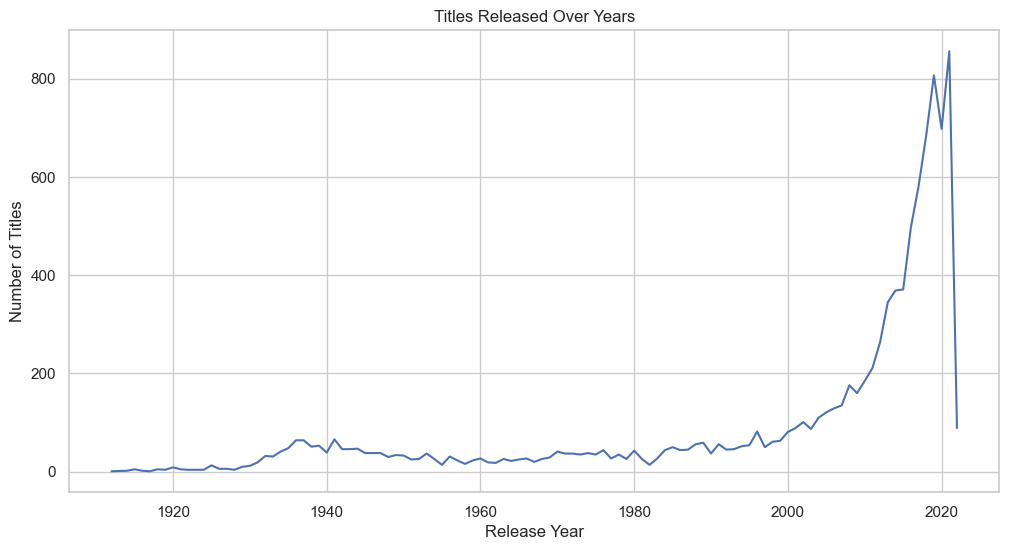

In [29]:
titles_by_year = titles.groupby('release_year').size().reset_index(name='count')
sns.lineplot(data=titles_by_year, x='release_year', y='count')
plt.title('Titles Released Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is best for visualizing changes over time. This chart tracks how content volume has evolved by release year.

##### 2. What is/are the insight(s) found from the chart?

There has been steady growth in the number of titles over the years, with a noticeable spike in recent years—indicating increased investment or licensing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Tracking content release trends helps in forecasting and benchmarking content pipeline strategies. If growth in title count is high but not matched with quality (e.g., ratings or genre diversity), it might indicate quantity over quality, leading to diluted user experience.

#### Chart - 5 : Runtime by Type

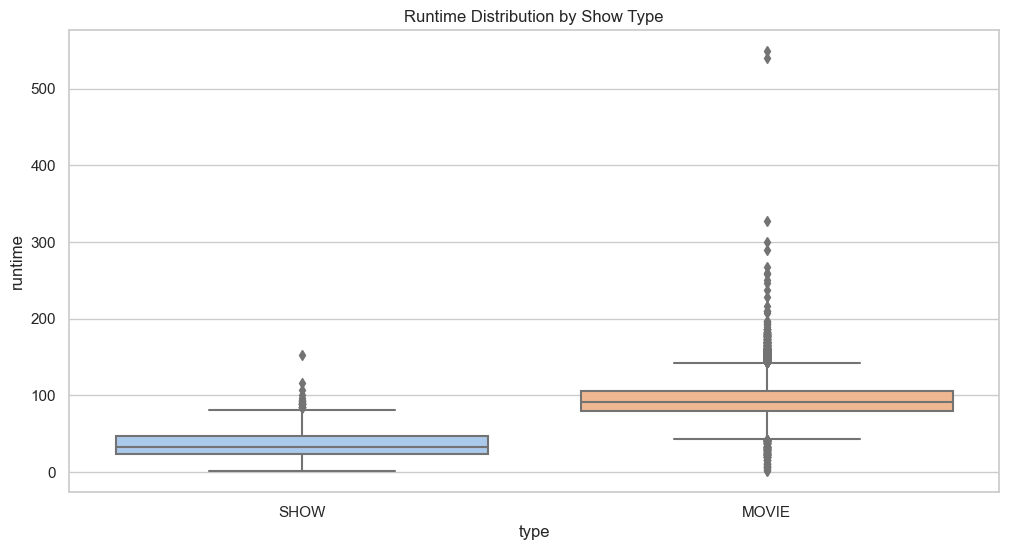

In [30]:
sns.boxplot(data=titles, x='type', y='runtime', palette='pastel')
plt.title('Runtime Distribution by Show Type')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is the best tool for visualizing distribution, median, and outliers in numerical data across categories. Here, it compares movie vs. show runtimes.

##### 2. What is/are the insight(s) found from the chart?

TV Shows typically have lower runtimes (per episode), while movies show a wider and higher range.
There are many outliers on both ends, especially for movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding runtime preferences helps optimize content length, catering to attention spans (e.g., short-form vs. long-form content). If too many titles fall into extreme runtime ranges, it could alienate viewers looking for standard-length content, especially on mobile.

#### Chart - 6 : Top Actors

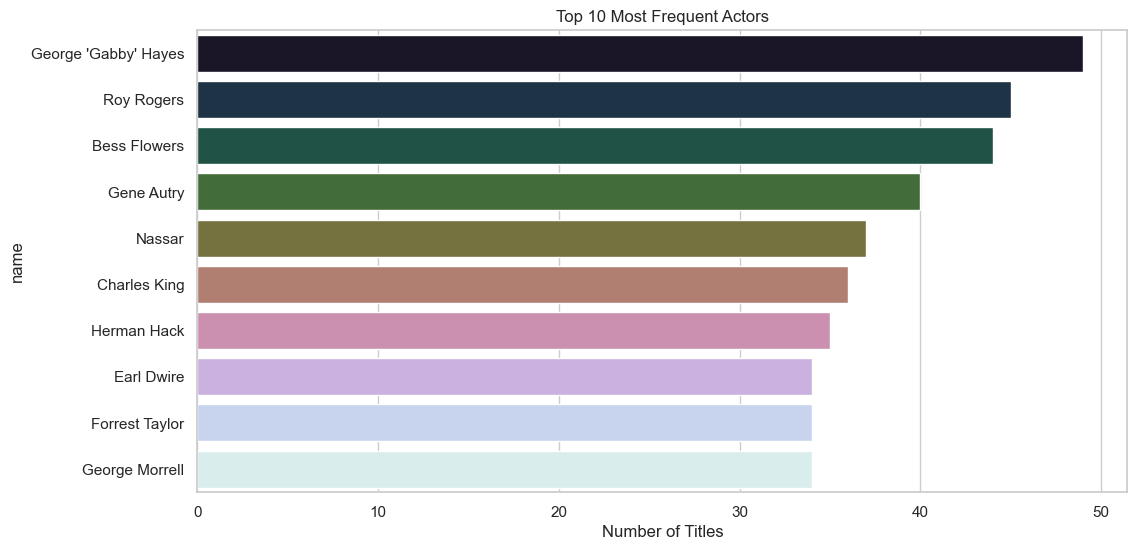

In [31]:
top_actors = credits[credits['role'] == 'ACTOR']['name'].value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='cubehelix')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is ideal for ranking frequency—here, it's used to identify actors who appear most frequently across titles.

##### 2. What is/are the insight(s) found from the chart?

A handful of actors appear far more frequently, indicating star power or contractual partnerships with Amazon Prime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Frequent actors can be leveraged in promotions or user recommendations to drive watch time. Overusing the same actors could lead to brand fatigue or limit diversity in casting, potentially alienating parts of the audience.

#### Chart - 7 : Top Directors

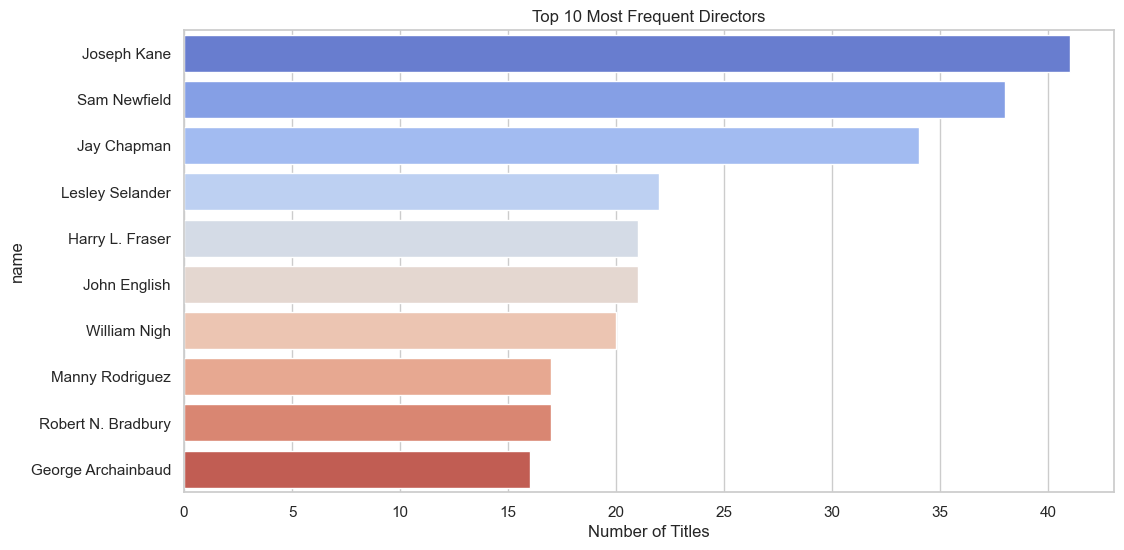

In [33]:
top_directors = credits[credits['role'] == 'DIRECTOR']['name'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

Same reasoning as with actors: a barplot is best for highlighting who directs the most content and understanding production trends.

##### 2. What is/are the insight(s) found from the chart?

Certain directors have produced a large volume of content, suggesting preferred working relationships or trusted collaborators.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-output directors can be key to consistent quality and efficiency. Their track record can influence audience trust.
Creative monotony could set in if there’s lack of directorial variety or innovation.



#### Chart - 8 : Top Production Countries

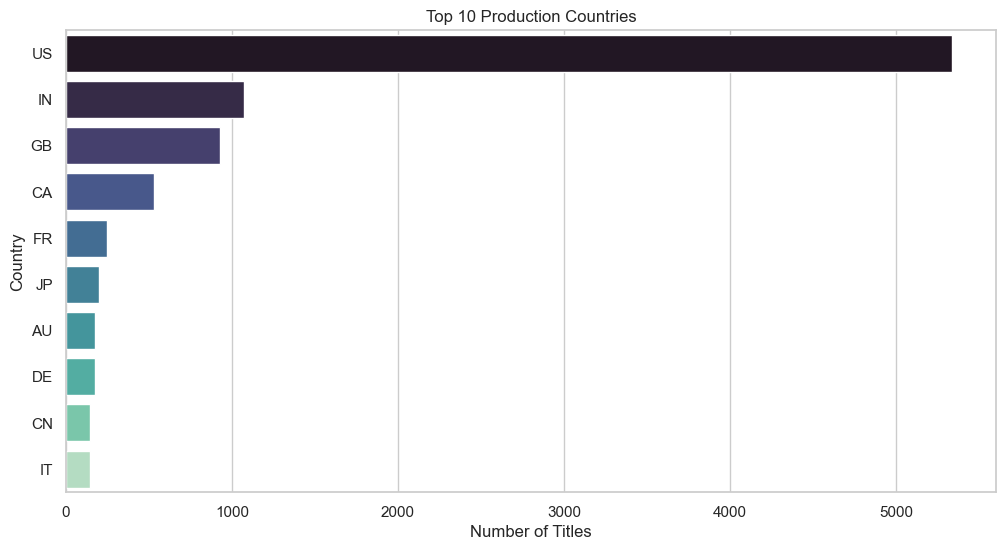

In [34]:
countries_list = titles['production_countries'].apply(lambda x: x.strip('[]').replace("'", "").split(', '))
countries_flat = [c.strip() for sublist in countries_list for c in sublist if c.strip() != '']
country_counts = pd.Series(countries_flat).value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot again helps show the top countries contributing to the content pool—critical for understanding cultural diversity and content origin.

##### 2. What is/are the insight(s) found from the chart?

Most content comes from the United States, followed by a few other regions like the UK and India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing the content origin helps tailor marketing strategies for regional markets and highlight diversity or local relevance. An overconcentration of content from a few countries might reduce global appeal, particularly in regions with distinct cultural tastes.

#### Chart - 9 : TMDB Popularity (Clipped at 95th Percentile)

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


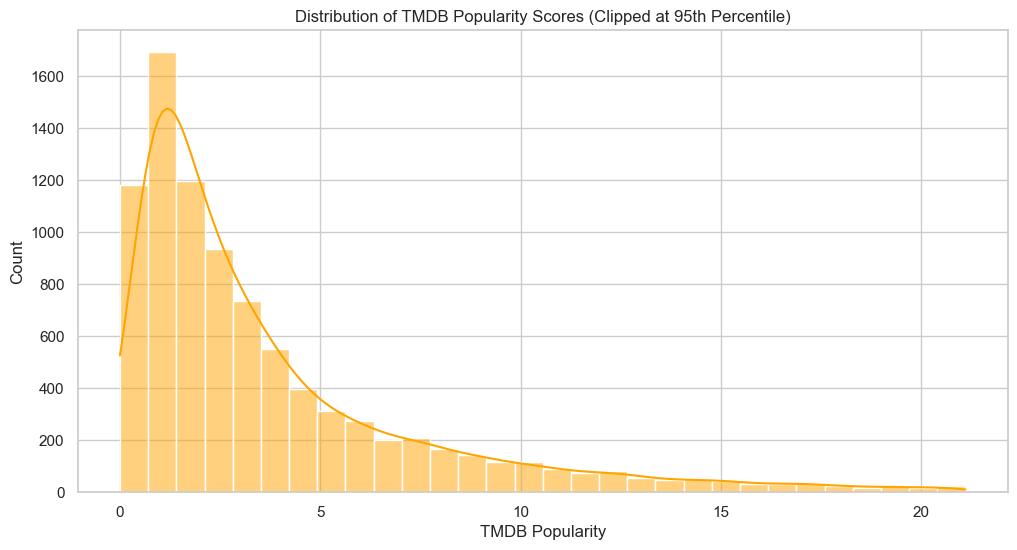

In [35]:
popularity_clipped = titles[titles['tmdb_popularity'] < titles['tmdb_popularity'].quantile(0.95)]
sns.histplot(popularity_clipped['tmdb_popularity'], bins=30, kde=True, color='orange')
plt.title('Distribution of TMDB Popularity Scores (Clipped at 95th Percentile)')
plt.xlabel('TMDB Popularity')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram (with clipping) gives a clearer view of how most titles perform without being skewed by extreme values. As the raw popularity scores (like tmdb_popularity) have extreme outliers, a small number of titles (like major blockbusters) with very high popularity that skew the entire distribution. Clipping at the 95th percentile removes the top 5% of extreme values (the outliers) normalizes the scale of the chart and helps you visualize the distribution of the remaining 95% of titles more clearly. This makes insights about typical or mid-tier titles more visible and actionable.

##### 2. What is/are the insight(s) found from the chart?

Most titles have low to moderate popularity. A small number dominate the top percentiles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It shows that most content needs more promotion or better placement, while the top 5% can be emphasized in marketing strategies. If a large majority of titles remain under-viewed, it signals possible content discovery issues or poor engagement, which may lead to content wastage.

Answer Here.

Answer Here

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### My Business Recommendation 
1. **Balance Content Types**  
   Increase TV show offerings to boost long-term engagement and retention.

2. **Diversify Genres**  
   Expand into underrepresented genres to attract niche audiences and reduce content fatigue.

3. **Promote Hidden Gems**  
   Improve discovery of lesser-known, quality titles using better recommendations and curation.

4. **Leverage Popular Talent**  
   Use frequent actors/directors in marketing to drive familiarity and viewership.

5. **Expand Global Reach**  
   Invest in localized content and regional partnerships to grow international audience share.

These strategies can help improve content impact, user satisfaction, and overall platform growth.l platform growth.


# **Conclusion**


This exploratory data analysis provided key insights into Amazon Prime Video’s content strategy, including the dominance of movies, popular genres, frequently featured talent, and distribution of content quality. 

The findings highlight areas of strength—such as consistent genre offerings and star collaborations—as well as opportunities for growth in content diversity, show development, and regional expansion.

These insights can guide data-driven decisions to enhance viewer engagement, improve content curation, and support strategic planning for sustainable business growth.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***